<a href="https://colab.research.google.com/github/Mykolays/Python/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data analysis with Pandas

The dataset "US Baby Names" contains statistics for the names of newborns in various states USA from 1910 to 2014.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(10, 8)})

path = "/content/drive/MyDrive/It in analitic/StateNames.csv"
baby_names = pd.read_csv(path, sep=",", index_col="Id")
baby_names

,Name,Year,Gender,State,Count
Id,,,,,
1,Mary,1910,F,AK,14
2,Annie,1910,F,AK,12
3,Anna,1910,F,AK,10
4,Margaret,1910,F,AK,8
5,Helen,1910,F,AK,7
...,...,...,...,...,...
5647422,Seth,2014,M,WY,5
5647423,Spencer,2014,M,WY,5
5647424,Tyce,2014,M,WY,5


* What is the number of observations? Number of features? Is all the data complete? What are the column types?

In [ ]:
baby_names.info()
baby_names.isna().any()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5647426 entries, 1 to 5647426
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Name    object
 1   Year    int64 
 2   Gender  object
 3   State   object
 4   Count   int64 
dtypes: int64(2), object(3)
memory usage: 258.5+ MB


Name      False
Year      False
Gender    False
State     False
Count     False
dtype: bool

We have 5647426 entries and 5 features, all copmlete data, 2 integer and 3 object type of fetures

* What is the most common name? How many times does it happen?

In [ ]:
baby_names.groupby("Name")["Count"].sum().sort_values(ascending=False).head(1)

Name
James    4957166
Name: Count, dtype: int64

The name James occurs most often (4957166 times)

* How many different names are there in the table? Which names - female or male - are more common?

In [ ]:
print(f"number of different names: {baby_names.Name.nunique()}")
baby_names.groupby('Gender')['Name'].nunique()

number of different names: 30274


Gender
F    20031
M    13139
Name: Name, dtype: int64

In [ ]:
gp = baby_names.groupby('Gender')['Name'].unique()
print(f"The number of names by which both boys and girls were called: {np.intersect1d(gp.F,gp.M).size}")

The number of names by which both boys and girls were called: 2896


* Find the top 10 female names in New York State (NY) in 2010.

In [ ]:
baby_names.query("State == 'NY' and Gender == 'F' and Year == 2010").groupby("Name")["Count"]\
          .sum().sort_values(ascending=False).head(10)

Name
Isabella    1521
Sophia      1382
Olivia      1184
Emma        1046
Ava          988
Madison      980
Emily        946
Mia          815
Abigail      784
Chloe        731
Name: Count, dtype: int64

* Select data from 2001. Find the top 10 names by state for the period 2001-2014.

In [ ]:
group_state_and_name = baby_names.query("Year >= 2001 and Year <= 2001").groupby(['State','Name'])["Count"].sum()
res = group_state_and_name.groupby('State').apply(lambda x: x.sort_values(ascending=False).head(10)).droplevel(1)
print(res)

State  Name   
AK     Michael    67
       Jacob      66
       Tyler      62
       Ethan      61
       Joseph     57
                  ..
WY     Tyler      35
       Hunter     34
       Jordan     33
       Ryan       32
       Logan      32
Name: Count, Length: 510, dtype: int64


* Find the average number of each name in all states from 2001 to 2014.

In [ ]:
baby_names.query("Year >= 2001 and Year <= 2001").groupby(['State','Name'])["Count"].mean()

State  Name   
AK     Aaliyah     5.0
       Aaron      29.0
       Abby        6.0
       Abigail    39.0
       Adam       19.0
                  ... 
WY     William    29.0
       Wyatt      19.0
       Zachary    25.0
       Zane       12.0
       Zoe         8.0
Name: Count, Length: 78193, dtype: float64

* Display on a graph the dynamics of the change in the popularity of the name Donald over all years (total for all states).

Text(0.5, 1.0, 'Dynamics of the change in the popularity of the name Donald over all years')

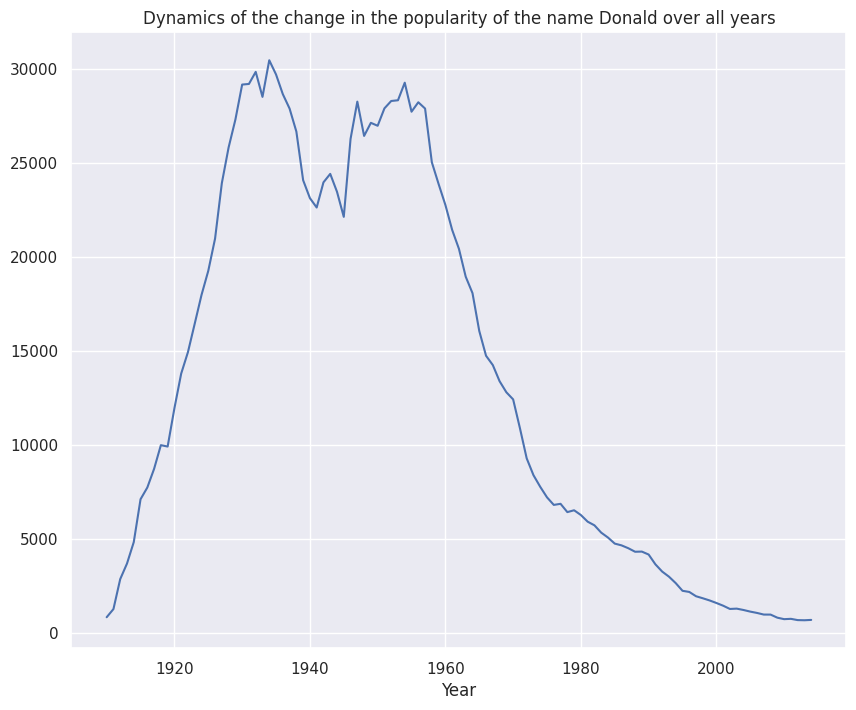

In [ ]:
baby_names[baby_names['Name']=='Donald'].groupby('Year')['Count'].sum().plot(kind='line', grid=True)
plt.title("Dynamics of the change in the popularity of the name Donald over all years")

* Build an infographic for the top 20 names in 2013.

Text(0.5, 1.0, 'Infographic for the top 20 names in 2013')

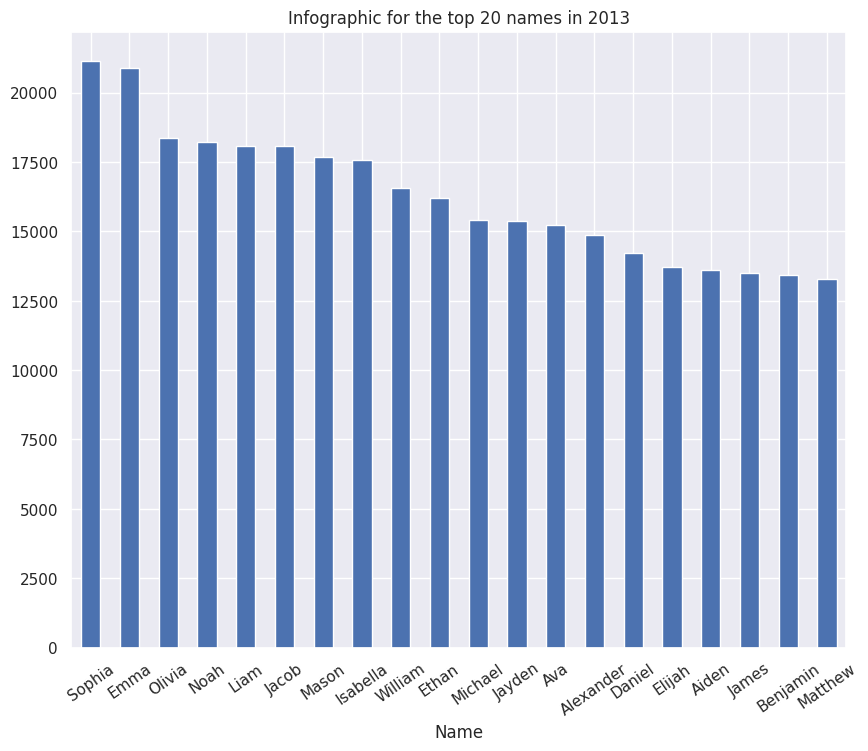

In [ ]:
a = baby_names[baby_names['Year']==2013].groupby('Name')['Count'].sum().sort_values(ascending=False).head(20)
a.plot(rot = 35, kind="bar")
plt.title("Infographic for the top 20 names in 2013")

* Plot the male birth rate by year in California (CA).

Text(0.5, 1.0, 'The male birth rate by year in California')

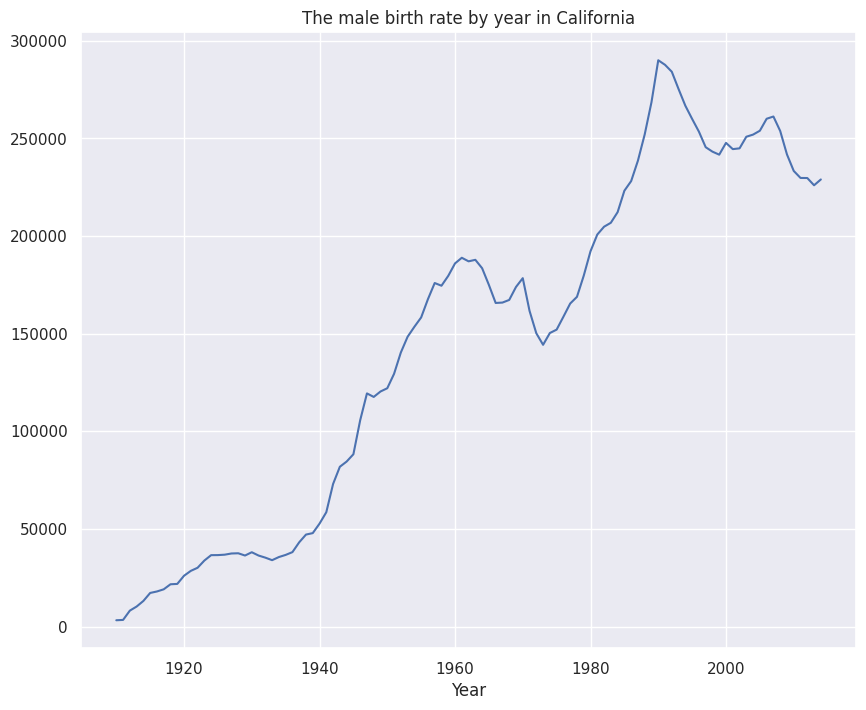

In [ ]:
baby_names[(baby_names.Gender == "M") & (baby_names.State == "CA")].groupby('Year')['Count'].sum().plot()
plt.title("The male birth rate by year in California")

* Graph the relationship between the popularity of the name Helen by state in 1910 and 2014. Calculate the correlation coefficient

Correlation coefficient:  0.1736879468088847


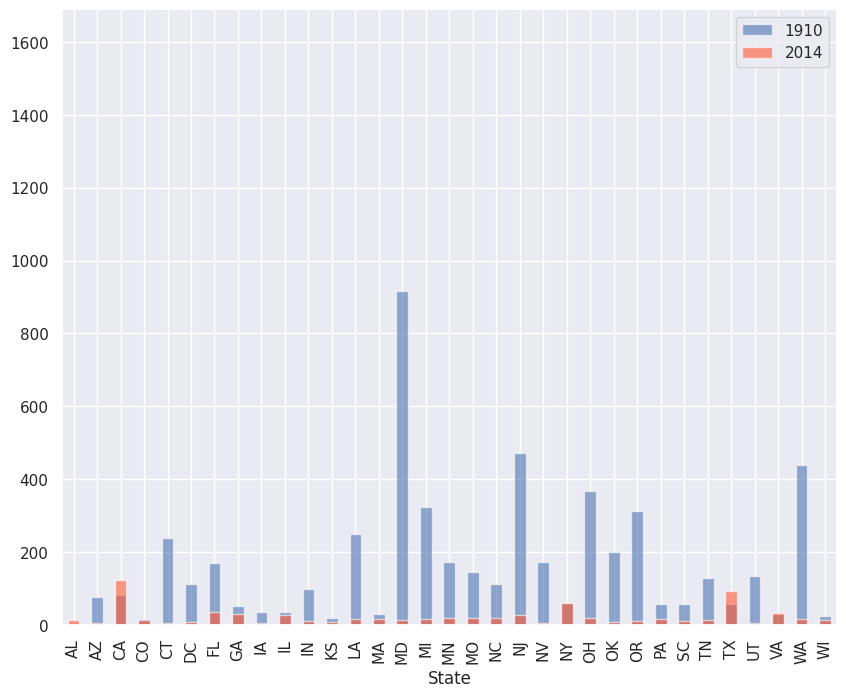

In [ ]:
helen_1910 = baby_names.query("Year == 1910 and Name == 'Helen'").groupby('State')['Count'].sum()
helen_2014 = baby_names.query("Year == 2014 and Name == 'Helen'").groupby('State')['Count'].sum()
print("Correlation coefficient: ",helen_1910.corr(helen_2014,method='pearson'))
helen_1910.plot(label = "1910", kind="bar", alpha=0.6)
helen_2014.plot(label = "2014", kind="bar",color="#FF5733", alpha=0.6)
plt.legend(loc=0)

helen = baby_names[(baby_names['Name'] == 'Helen') & ((baby_names['Year'] == 1910) | (baby_names['Year'] == 2014))]
helen_by_state = helen.pivot_table(index=['State'], values='Count',columns='Year', aggfunc='sum')
plt.show()

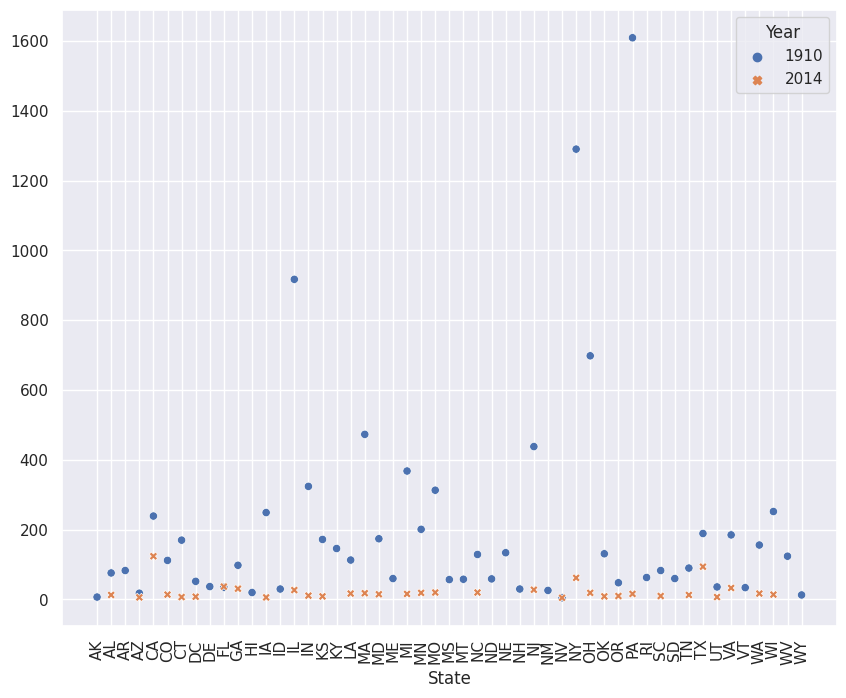

In [ ]:
sns.scatterplot(data = helen_by_state)
plt.xticks(rotation=90)
plt.show()

Correlation coefficient is 0.17, what means low positive linear relationship between this features